###  Decision Tree Algorithm using python

### Problem Defination: To predict whether mushroom is poisonous or edible.

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

A Decision Tree learning is a predictive modeling approach. It is used to address classification problems in statistics, data mining, and machine learning.

### CART - Classification and Regression Trees

### Importing Libraries and Dataset

Importing libraries matplotlib and seaborn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

Importing data set

In [3]:
dataset = pd.read_csv('mushrooms.csv')

###  Exploratory data analysis 

In [4]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.isnull().sum().sum()

0

There is no null value in the dataset

In [6]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
### Display unique values of Response variable (class)

In [8]:
dataset['class'].unique()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [9]:
# To see if there is any null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are categorical and there is no missing value.

In [10]:
#To find number of rows and column
dataset.shape

(8124, 23)

<AxesSubplot:xlabel='class', ylabel='Count'>

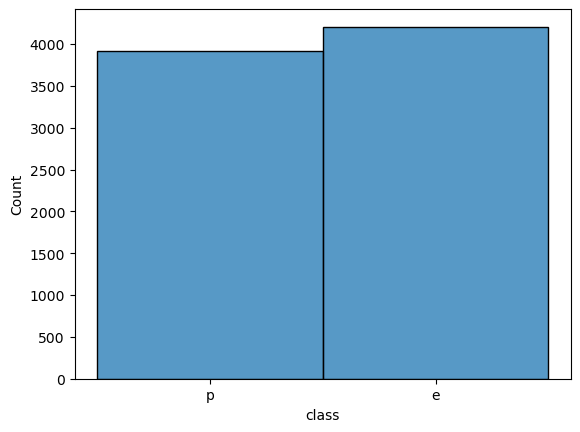

In [11]:
sns.histplot(dataset['class'])

### Separating Features and Target

Target is in column class. So X will have all values apart from column class and y will have column class

In [12]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

In [13]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [14]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

As all the values in the dataset are categorical.
X can be encoded using pandas dummy variable and y using LabelEncoder.

Dummy variable creates a separte column for each unique value of the column, where as LabelEncoder encodes target labels with value between 0 and n_classes-1. LabelEncoder should be used to encode target values, i.e. y, and not the input X.

In [15]:
# how to get dummies for all x variable

In [16]:
X = pd.get_dummies(X)
X.head()

# for  those who are getting True / False , convert into int as follows.
#X = pd.get_dummies(X).astype(int)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
# how to get dummies or convert categorical alphabet value e or p to 1 and 0
# use LabelEncoder

#Encode target labels with value between 0 and n_classes-1.

# OrdinalEncoder
# Encode categorical features using an ordinal encoding scheme.

# OneHotEncoder
# Encode categorical features as a one-hot numeric array.

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as
Poisonous = p -> 1
Edible = e -> 0

### Splitting Dataset to training and test data 80 % - 20 %

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape , X_test.shape

((6499, 117), (1625, 117))

In [21]:
y_train.shape , y_test.shape

((6499,), (1625,))

### Decision Tree Creation 

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [23]:
from sklearn.metrics import accuracy_score

### Creation of Decision Tree using Gini Index

In [24]:
#Create model using gini 

In [25]:
#Using the Decision Tree Classifier with splitting criterion 
# as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1610,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1939,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
5573,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
7076,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2000,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3388, 3111]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3660\nvalue = [637, 3023]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.135\nsamples = 3229\nvalue = [236, 2993]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.055\nsamples = 3080\nvalue = [87, 2993]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 149\nvalue = [149, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.13\nsamples = 431\nvalue = [401, 30]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 401\nvalue = [401, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.06\nsamples = 2839\nvalue = [2751, 88]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.023\nsamples = 2784\nvalue = [2751, 33]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.002\nsamples = 2740\nval

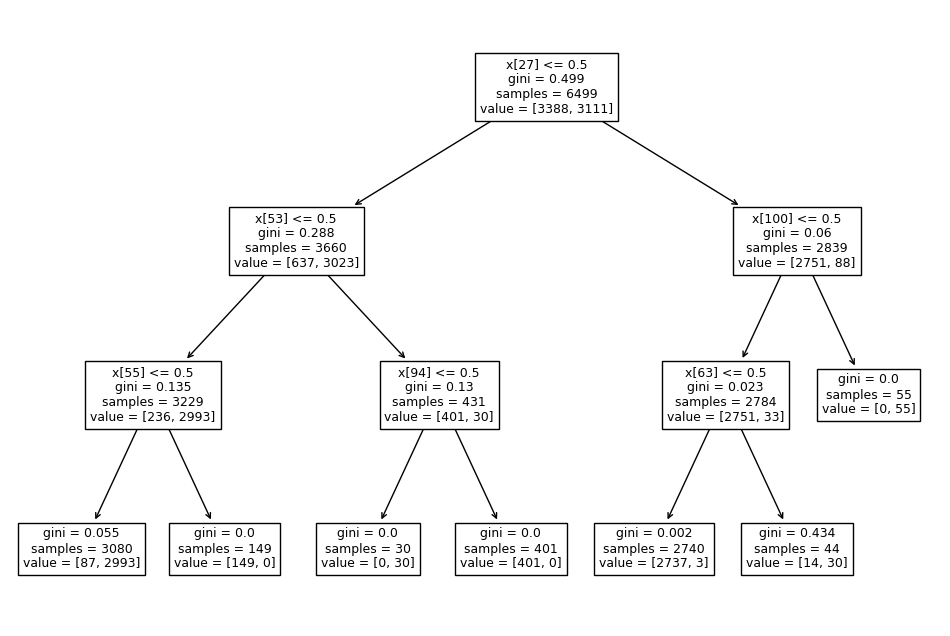

In [27]:
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

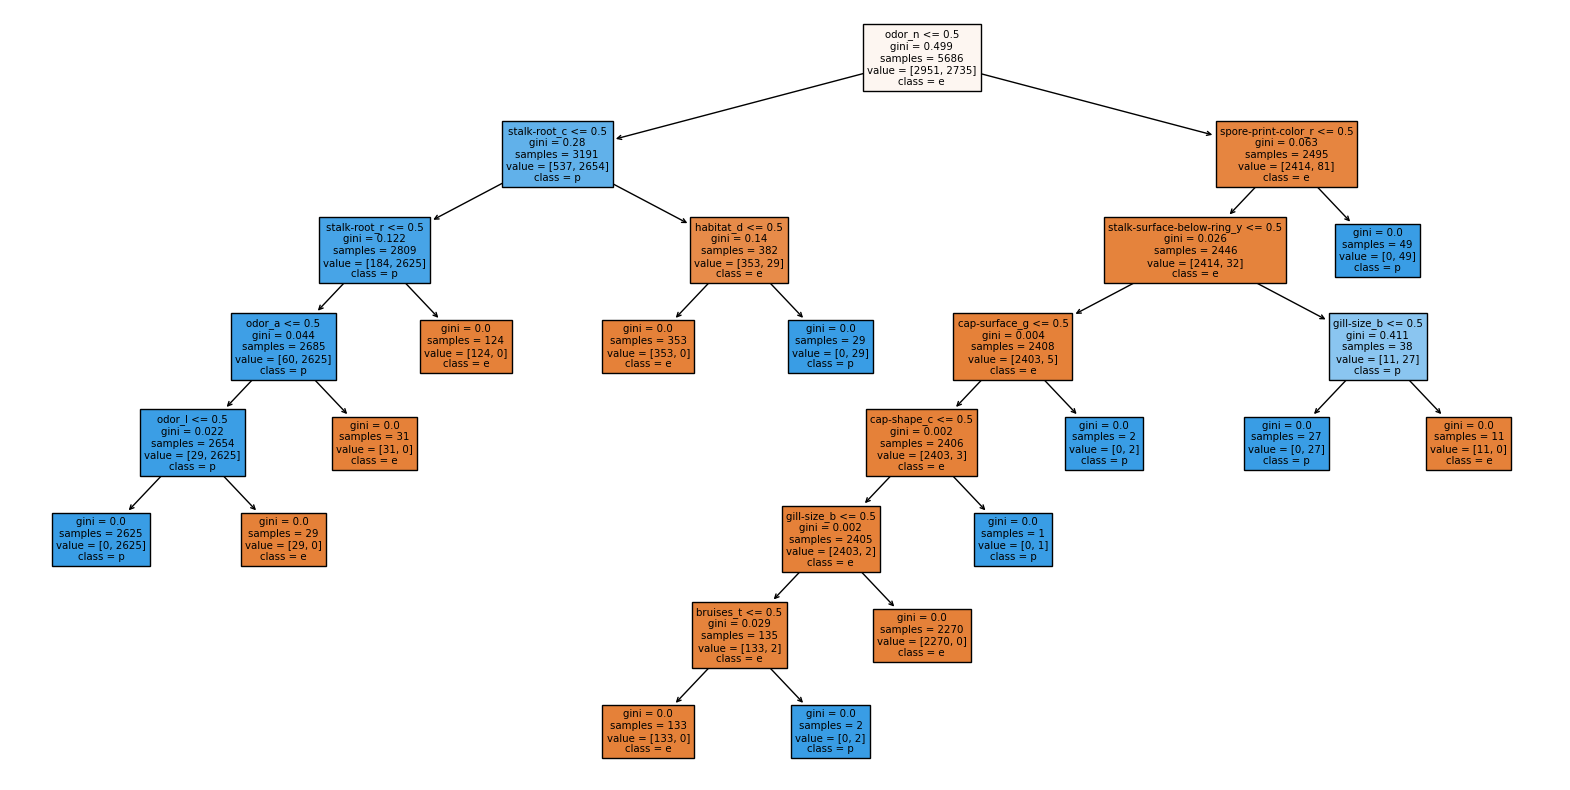

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming your data is loaded into a DataFrame called df
# df = pd.read_csv('your_dataset.csv')

# Define target variable and features
target = 'class'
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring',
            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
            'ring-type', 'spore-print-color', 'population', 'habitat']

# Create dummy variables
X = pd.get_dummies(dataset[features])
y = dataset[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get the feature names after get_dummies
feature_names = X.columns.tolist()

# Initialize the classifier
clf_gini = DecisionTreeClassifier()

# Fit the classifier
clf_gini.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=feature_names, class_names=clf_gini.classes_, filled=True)
plt.show()


In [29]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

Overfitting occurs when accuracy for traning set is high and test set is very low comparing to training set. Overfitting is very common problem with decision tree.

In [30]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['p', 'e', 'p', ..., 'e', 'p', 'e'], dtype=object)

In [31]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 1.0000
Training-set accuracy score: 1.0000


### Creation of Decision Tree using with entropy

In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.654\nsamples = 3191\nvalue = [537, 2654]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.975\nsamples = 907\nvalue = [537, 370]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.917\nsamples = 554\nvalue = [184, 370]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2284\nvalue = [0, 2284]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.207\nsamples = 2495\nvalue = [2414, 81]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.101\nsamples = 2446\nvalue = [2414, 32]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.021\nsamples = 2408\nvalue = [2403, 5]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.868\nsamples = 38\nvalue = [11, 27]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsa

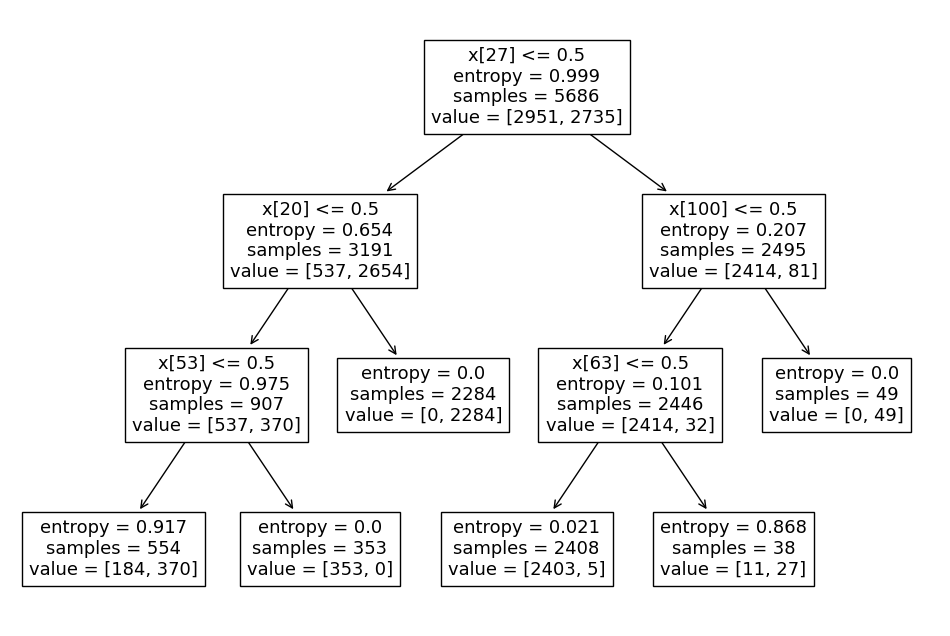

In [33]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [34]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [35]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [36]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9541
Training-set accuracy score: 0.9648


In [37]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9648
Test set score: 0.9541


### Confusion Matrix 

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [39]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1148  109]
 [   3 1178]]


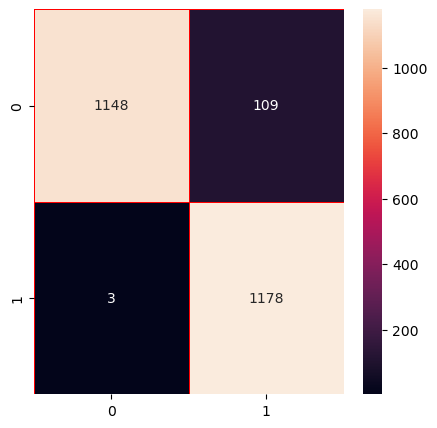

<Figure size 640x480 with 0 Axes>

In [40]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [41]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           e       1.00      0.91      0.95      1257
           p       0.92      1.00      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.96      0.96      0.95      2438
weighted avg       0.96      0.95      0.95      2438



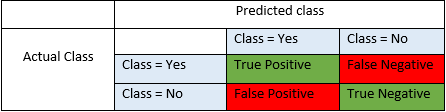

In [42]:
#### DO NOT WRITE THIS CODE  
from IPython import display
display.Image("./Confusion Matrix.png")

In [43]:
# Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

# Accuracy = TP+TN/TP+FP+FN+TN

# Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

# Precision = TP/TP+FP

# Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

# Recall = TP/TP+FN

# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### Conclusion

Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.